### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정 : 
    - 브라우져를 화면에 띄우지 않고 RAM 영역에만 띄어서 사용하는 방법
    - 팬텀js는 요새 안씀.
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [21]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린 샷

In [22]:
# 박효신 눈의꽃 2절 시작 부분
url = 'https://www.youtube.com/watch?v=C_TsCZwdva4&t=120s'
driver = webdriver.Chrome()
driver.get(url)

In [23]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

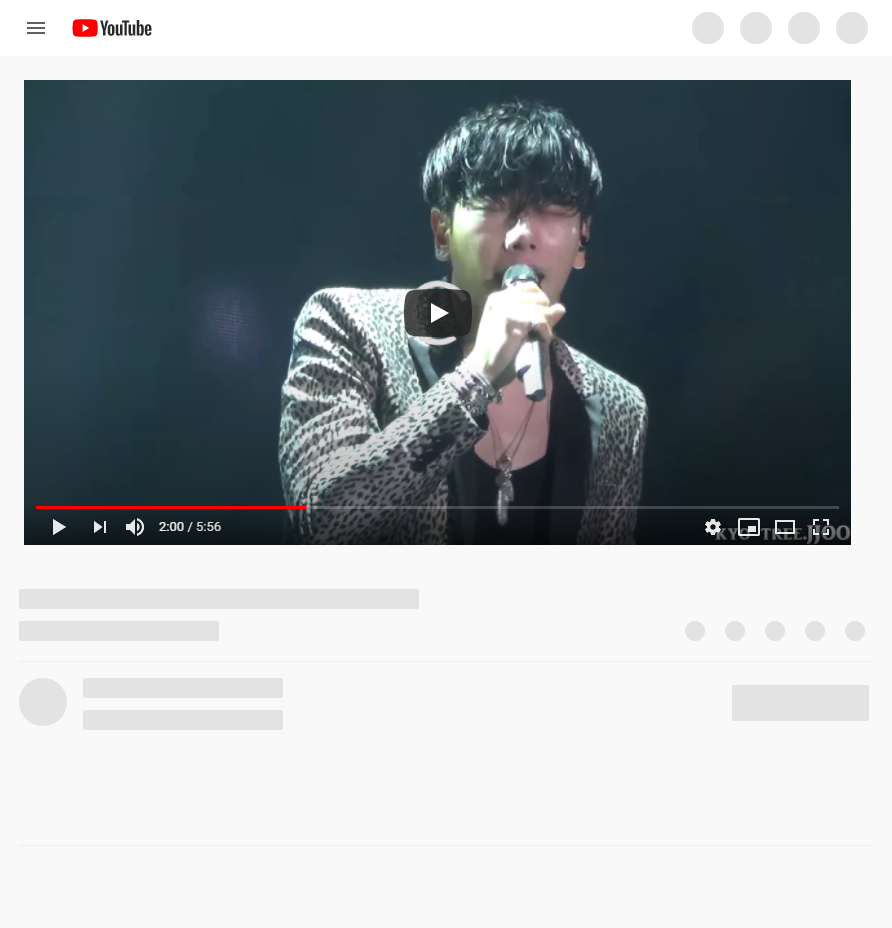

In [24]:
pil_img = pil.open("datas/screenshot.png")
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [25]:
driver = webdriver.Chrome()
driver.get(url)

In [26]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 465, 'width': 827}


In [27]:
# area 변경
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']
area = (left, top, right, bottom)
area

(24, 80, 851, 545)

#### 3. 이미지를 pillow로 잘라주기

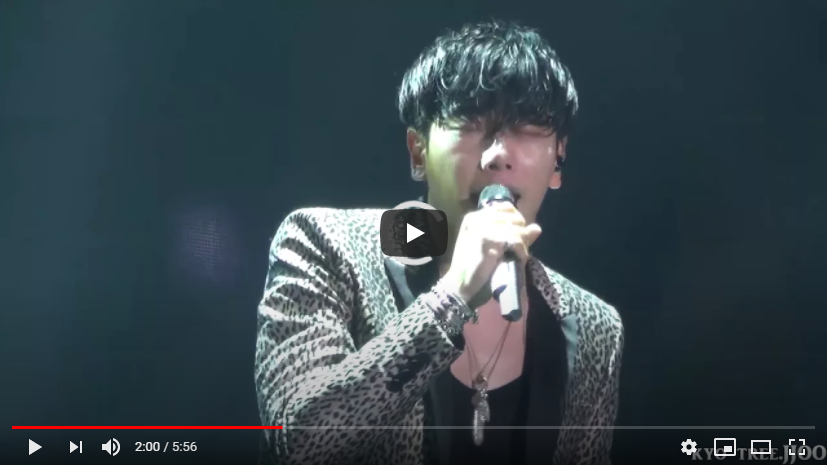

In [28]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [29]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

#### 썸네일 만들기: 원본 이미지를 다양한 사이즈로 축소하는 방법

In [30]:
pil_element_img.size

(827, 465)

<PIL.Image.Image image mode=RGBA size=285x160 at 0x1EAA0767EE0>


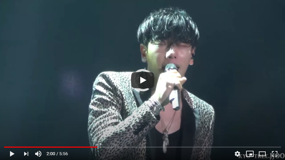

In [31]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img)
pil_element_img

#### fake useragent

In [32]:
from fake_useragent import UserAgent

In [18]:
# Chrome driver의 Agent 확인
driver = webdriver.Chrome()

In [19]:
agent = driver.execute_script("return navigator.userAgent;")
agent

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36'

In [ ]:
driver.quit()

In [39]:
UserAgent().chrome

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36'

In [35]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options = options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36


#### Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 60 버전 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용가능

In [40]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options = options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


#### 영상 파일 다운로드
- www. -> ss 로 변경하면 다운로드 받을수 있는 사이트에 접속

In [48]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [42]:
url = 'https://www.youtube.com/watch?v=C_TsCZwdva4'

In [50]:
link = 'https://r1---sn-oguelner.googlevideo.com/videoplayback?expire=1604827547&ei=O2WnX6SpNove1wKNmrgY&ip=101.51.59.203&id=o-AI3iDGVtIiaQkel_QQ88wohPtyeKcEoZZB8WqVqZKfSN&itag=18&source=youtube&requiressl=yes&vprv=1&mime=video%2Fmp4&gir=yes&clen=25686529&ratebypass=yes&dur=356.310&lmt=1538119836308234&fvip=1&c=WEB&txp=5531332&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cgir%2Cclen%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgXQqsL_LOUZkmULLR8mNQ1s9JQaPU3jDyK2eiYZ8Wz6MCIB7Z-lXhD4x4BWaLHCOBalPz-CPI00I7Z-_PMcO5P4pA&rm=sn-uvu-c33el7e,sn-uvu-c33e67e,sn-30al67e&req_id=757eb1054133a3ee&redirect_counter=3&cms_redirect=yes&ipbypass=yes&mh=sb&mip=175.212.202.233&mm=30&mn=sn-oguelner&ms=nxu&mt=1604806221&mv=m&mvi=1&pl=17&lsparams=ipbypass,mh,mip,mm,mn,ms,mv,mvi,pl&lsig=AG3C_xAwRAIgVU20HCUy1nYmXMzIgDrMJ4x5ZOZRdSsP6NLCwe4t33kCIBrRvFPhahTQQkKsY9AJlXuOTBv5m42FrlPW6yKO3CdW'

In [51]:
title = '진정제.mp4'
size = download(title, link)
print("{} Mb".format(size/1024/1024))

24.4970703125 Mb
